In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# importing linear regression function
import sklearn.linear_model as lm

# function to calculate r-squared, MAE, RMSE
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

%matplotlib inline

In [2]:
df = pd.read_csv('Data/Grade_Set_1.csv')
df.head(9)

,Hours_Studied,Test_Grade
0,2,57
1,3,66
2,4,73
3,5,76
4,6,79
5,7,81
6,8,90
7,9,96
8,10,100


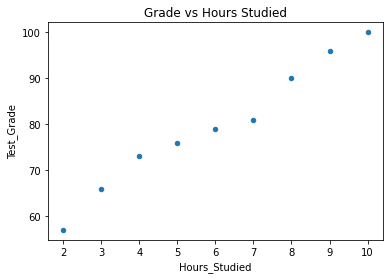

In [3]:
# Simple scatter plot
df.plot(kind='scatter', x='Hours_Studied', y='Test_Grade', title='Grade vs Hours Studied')
plt.show()

In [4]:
# check the correlation between variables
print("Correlation Matrix: ")
df.corr()

Correlation Matrix: 


,Hours_Studied,Test_Grade
Hours_Studied,1.000000,0.987797
Test_Grade,0.987797,1.000000


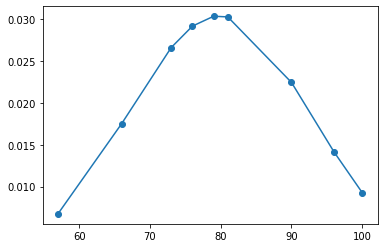

In [5]:
# Lets plot the distribution
fit = stats.norm.pdf(df.Test_Grade, np.mean(df.Test_Grade), np.std(df.Test_Grade))  
plt.plot(df.Test_Grade,fit,'-o')
#plt.hist(df.Test_Grade,normed=True)     
plt.show() 

In [6]:
lr = lm.LinearRegression()

In [7]:
x= df.Hours_Studied[:,np.newaxis] # independent variable



/home/chintoo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


In [8]:
y= df.Test_Grade.values            # dependent variable 
print(y)

[ 57  66  73  76  79  81  90  96 100]


In [9]:
# Train the model using the training sets
lr.fit(x, y)

LinearRegression()

In [10]:
print ("Intercept: ", lr.intercept_)
print ("Coefficient: ", lr.coef_)

Intercept:  49.67777777777776
Coefficient:  [5.01666667]


## y=mx+c

In [11]:
# manual prediction for a given value of x
print ("Manual prdiction :", 52.2928994083 + 4.74260355*6)

Manual prdiction : 80.7485207083


Using predict function:  [79.77777778]


Text(0.5, 0, 'Hours_Studied')

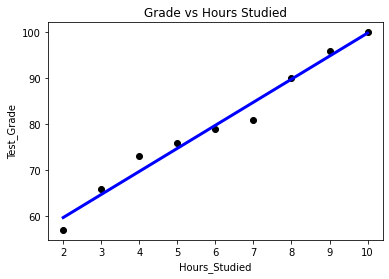

In [12]:
# predict using the built-in function
print ("Using predict function: ", lr.predict(np.array([6]).reshape(1, 1)))

# plotting fitted line
plt.scatter(x, y,  color='black')
plt.plot(x, lr.predict(x), color='blue', linewidth=3)
plt.title('Grade vs Hours Studied')
plt.ylabel('Test_Grade')
plt.xlabel('Hours_Studied')